# Q.2 What is the difference of infrastructure between Rural and Urban areas?

In [304]:
# Importing libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv
import seaborn as sns


## Loading Data

This section of code loads the required data from files and creates dataframes limited to the relevant columns we will be using

### Ofcom broadband data:

In [305]:
#Loading the Ofcom 2021 broadband data
broadband_data = pd.read_csv('202105_fixed_laua_coverage_r01.csv', header=0)
broadband_data.head()

,laua,laua_name,All Premises,All Matched Premises,SFBB availability (% premises),UFBB (100Mbit/s) availability (% premises),UFBB availability (% premises),Full Fibre availability (% premises),Gigabit availability (% premises),% of premises unable to receive 2Mbit/s,...,Number of premises with 0<2Mbit/s download speed,Number of premises with 2<5Mbit/s download speed,Number of premises with 5<10Mbit/s download speed,Number of premises with 10<30Mbit/s download speed,% of premises with 30<300Mbit/s download speed,% of premises with >=300Mbit/s download speed,% of premises with 0<2Mbit/s download speed,% of premises with 2<5Mbit/s download speed,% of premises with 5<10Mbit/s download speed,% of premises with 10<30Mbit/s download speed
0,S12000033,ABERDEEN CITY,127083,126107,94.4,61.5,55.8,51.2,51.2,0.1,...,65,145,509,5393,38.7,55.8,0.1,0.1,0.4,4.2
1,S12000034,ABERDEENSHIRE,126320,125293,83.2,11.7,11.6,11.6,11.6,2.6,...,3241,3966,4395,8644,71.5,11.6,2.6,3.1,3.5,6.8
2,E07000223,ADUR,29865,29795,98.7,85.7,85.4,1.5,1.5,0.0,...,3,11,32,274,13.3,85.4,0.0,0.0,0.1,0.9
3,E07000026,ALLERDALE,51812,51555,92.6,3.2,3.2,3.2,3.2,1.2,...,601,502,513,1940,89.4,3.2,1.2,1.0,1.0,3.7
4,E07000032,AMBER VALLEY,61441,61100,95.2,30.8,27.4,24.3,24.3,0.1,...,61,134,258,2151,67.9,27.4,0.1,0.2,0.4,3.5


In [306]:
#select specific columns needed: local authority code, local authority name, % of premises that can receive full fibre,
# % of premises that can receive Superfast broadband, % of premises that can receive ultrafast broadband,
# of premises with 0<2Mbit/s download speed, % of premises with 2<5Mbit/s download speed,% of premises with 5<10Mbit/s download speed
broadband_data = broadband_data[['laua',
            'laua_name',
            'Full Fibre availability (% premises)',
            'SFBB availability (% premises)',
            'UFBB availability (% premises)',
            '% of premises with 0<2Mbit/s download speed',
            '% of premises with 2<5Mbit/s download speed',
            '% of premises with 5<10Mbit/s download speed'
            
        ]]
#Change 'laua_name' to 'Name'
broadband_data = broadband_data.rename({'laua_name':'Name'}, axis='columns')
broadband_data.head()

,laua,Name,Full Fibre availability (% premises),SFBB availability (% premises),UFBB availability (% premises),% of premises with 0<2Mbit/s download speed,% of premises with 2<5Mbit/s download speed,% of premises with 5<10Mbit/s download speed
0,S12000033,ABERDEEN CITY,51.2,94.4,55.8,0.1,0.1,0.4
1,S12000034,ABERDEENSHIRE,11.6,83.2,11.6,2.6,3.1,3.5
2,E07000223,ADUR,1.5,98.7,85.4,0.0,0.0,0.1
3,E07000026,ALLERDALE,3.2,92.6,3.2,1.2,1.0,1.0
4,E07000032,AMBER VALLEY,24.3,95.2,27.4,0.1,0.2,0.4


### 2011 Rural/Urban Classification data

In [307]:
#Loading the 2011 census rural/urban classification data
rural_urban_data = pd.read_excel('RUC11_LAD11_ENv2.xlsx', header=0)
rural_urban_data.head()

,LAD11CD,LAD11NM,RUC11CD,RUC11,Rural population1,Hub towns (rural related) population1,Rural including hub towns (rural & rural related) population1,Total population1,Rural including hub towns (rural & rural related) population1
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,(%)
1,E06000001,Hartlepool,4.0,Urban with City and Town,3173,0.0,3173.0,92028.0,3.4
2,E06000002,Middlesbrough,4.0,Urban with City and Town,957,0.0,957.0,138412.0,0.7
3,E06000003,Redcar and Cleveland,3.0,Urban with Significant Rural (rural including ...,43880,0.0,43880.0,135177.0,32.5
4,E06000004,Stockton-on-Tees,4.0,Urban with City and Town,7536,0.0,7536.0,191610.0,3.9


In [308]:
#Renaming certain colums for ease of interpretation
rural_urban_data = rural_urban_data.rename({'LAD11NM':'Name',
                                            'RUC11':'Classification',
                                            'RUC11CD':'Numerical classification',
                                            'LAD11CD':'laua'}, axis='columns')
rural_urban_data.head()


,laua,Name,Numerical classification,Classification,Rural population1,Hub towns (rural related) population1,Rural including hub towns (rural & rural related) population1,Total population1,Rural including hub towns (rural & rural related) population1
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,(%)
1,E06000001,Hartlepool,4.0,Urban with City and Town,3173,0.0,3173.0,92028.0,3.4
2,E06000002,Middlesbrough,4.0,Urban with City and Town,957,0.0,957.0,138412.0,0.7
3,E06000003,Redcar and Cleveland,3.0,Urban with Significant Rural (rural including ...,43880,0.0,43880.0,135177.0,32.5
4,E06000004,Stockton-on-Tees,4.0,Urban with City and Town,7536,0.0,7536.0,191610.0,3.9


In [309]:
#select specific columns I need: Local authority code, local authority name,Classification, Numerical classification
rural_urban_data = rural_urban_data[['laua','Name', 'Classification','Numerical classification']]
rural_urban_data.head()

,laua,Name,Classification,Numerical classification
0,NaN,NaN,NaN,NaN
1,E06000001,Hartlepool,Urban with City and Town,4.0
2,E06000002,Middlesbrough,Urban with City and Town,4.0
3,E06000003,Redcar and Cleveland,Urban with Significant Rural (rural including ...,3.0
4,E06000004,Stockton-on-Tees,Urban with City and Town,4.0


### Latitude/longitude data for mapping

In [310]:
#Loading the location data to be used for mapping (latitude and longitude)
location_data = pd.read_csv('area_grid.csv', header=0)
location_data.head()

,District,County,District Code,Latitude,Longitude,Postcodes,Active Postcodes,Households,Population,Type
0,Aberdeen City,NaN,S12000033,57.149502,-2.133050,14396,6273,103304,222604,Council Area
1,Aberdeenshire,NaN,S12000034,57.353298,-2.322470,21516,9777,104592,252583,Council Area
2,Adur,West Sussex,E07000223,50.833099,-0.285009,3027,1793,26952,61167,Local Authority District
3,Allerdale,Cumbria,E07000026,54.713100,-3.361350,5540,4086,42362,96468,Local Authority District
4,Amber Valley,Derbyshire,E07000032,53.037701,-1.424460,4982,2831,52602,122335,Local Authority District


In [311]:
#extracting required data: local authority name, local authority code, latitude, longitude
location_data = location_data[['District', 'District Code', 'Latitude','Longitude']]
location_data.head()

,District,District Code,Latitude,Longitude
0,Aberdeen City,S12000033,57.149502,-2.133050
1,Aberdeenshire,S12000034,57.353298,-2.322470
2,Adur,E07000223,50.833099,-0.285009
3,Allerdale,E07000026,54.713100,-3.361350
4,Amber Valley,E07000032,53.037701,-1.424460


## Cleaning Data
In this section we inspect our dataframes to ensure the data is as expected and check for missing values

In [312]:
#Checking Broadband data
broadband_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 8 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   laua                                          374 non-null    object 
 1   Name                                          374 non-null    object 
 2   Full Fibre availability (% premises)          374 non-null    float64
 3   SFBB availability (% premises)                374 non-null    float64
 4   UFBB availability (% premises)                374 non-null    float64
 5   % of premises with 0<2Mbit/s download speed   374 non-null    float64
 6   % of premises with 2<5Mbit/s download speed   374 non-null    float64
 7   % of premises with 5<10Mbit/s download speed  374 non-null    float64
dtypes: float64(6), object(2)
memory usage: 23.5+ KB


We see that this returns 374 entries, consistent with the number of local authorities in the UK
Our filtered columns do not contain any null values
note: the original dataset did contain nulls for some of the other columns but as we will not be using these in our analysis we
can proceed using the filtered 'clean' dataset

In [313]:
# Checking rural/urban data
rural_urban_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329 entries, 0 to 328
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   laua                      326 non-null    object 
 1   Name                      326 non-null    object 
 2   Classification            326 non-null    object 
 3   Numerical classification  326 non-null    float64
dtypes: float64(1), object(3)
memory usage: 10.4+ KB


We see that this returns 329 entries, this is less than the broadband dataset as we were only able to source data for England and not the whole of the UK, The number of local authorities in England should be 326 so we need to investigate the dataframe further

We can see that our dataframe contains null values so the code in the next cell returns the rows containing any nan values

In [314]:
nan_values = rural_urban_data[rural_urban_data.isna().any(axis=1)]
print (nan_values)

    laua Name Classification  Numerical classification
0    NaN  NaN            NaN                       NaN
327  NaN  NaN            NaN                       NaN
328  NaN  NaN            NaN                       NaN


We see that column indices 0,327,328 contain completely blank rows so we can drop these to produce our clean dataset

In [315]:
rural_urban_data = rural_urban_data.drop(index=[0,327,328])
rural_urban_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 326 entries, 1 to 326
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   laua                      326 non-null    object 
 1   Name                      326 non-null    object 
 2   Classification            326 non-null    object 
 3   Numerical classification  326 non-null    float64
dtypes: float64(1), object(3)
memory usage: 12.7+ KB


In [316]:
#Checking location data
location_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   District       374 non-null    object 
 1   District Code  374 non-null    object 
 2   Latitude       374 non-null    float64
 3   Longitude      374 non-null    float64
dtypes: float64(2), object(2)
memory usage: 11.8+ KB


We see that this returns 374 entries, again consistent with the number of local authorities across the whole of the UK 
Our filtered columns do not contain any null values
note: the original dataset did contain nulls for some of the other columns but as we will not be using these in our analysis we can proceed using the filtered 'clean' dataset

## Merging Datasets
In this section we will merge our data sets to produce a single dataframe for ease of analysis

In [317]:
#Joining the broadband and rural/urban datasets
bb_ru_merged = pd.merge(broadband_data,
                  rural_urban_data,
                  on ='laua',
                  how ='inner')
bb_ru_merged.head()

,laua,Name_x,Full Fibre availability (% premises),SFBB availability (% premises),UFBB availability (% premises),% of premises with 0<2Mbit/s download speed,% of premises with 2<5Mbit/s download speed,% of premises with 5<10Mbit/s download speed,Name_y,Classification,Numerical classification
0,E07000223,ADUR,1.5,98.7,85.4,0.0,0.0,0.1,Adur,Urban with City and Town,4.0
1,E07000026,ALLERDALE,3.2,92.6,3.2,1.2,1.0,1.0,Allerdale,Mainly Rural (rural including hub towns >=80%),1.0
2,E07000032,AMBER VALLEY,24.3,95.2,27.4,0.1,0.2,0.4,Amber Valley,Urban with Minor Conurbation,5.0
3,E07000224,ARUN,8.3,96.5,10.6,0.1,0.1,0.2,Arun,Urban with City and Town,4.0
4,E07000170,ASHFIELD,3.9,98.0,86.6,0.0,0.4,0.1,Ashfield,Urban with City and Town,4.0


In [318]:
bb_ru_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 295 entries, 0 to 294
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   laua                                          295 non-null    object 
 1   Name_x                                        295 non-null    object 
 2   Full Fibre availability (% premises)          295 non-null    float64
 3   SFBB availability (% premises)                295 non-null    float64
 4   UFBB availability (% premises)                295 non-null    float64
 5   % of premises with 0<2Mbit/s download speed   295 non-null    float64
 6   % of premises with 2<5Mbit/s download speed   295 non-null    float64
 7   % of premises with 5<10Mbit/s download speed  295 non-null    float64
 8   Name_y                                        295 non-null    object 
 9   Classification                                295 non-null    obj

In [319]:
#Joining the broadband and rural/urban data with the location data
bb_ru_loc_merged = pd.merge(bb_ru_merged,location_data,left_on ='laua',right_on = 'District Code',how ='inner')
bb_ru_loc_merged.head()

,laua,Name_x,Full Fibre availability (% premises),SFBB availability (% premises),UFBB availability (% premises),% of premises with 0<2Mbit/s download speed,% of premises with 2<5Mbit/s download speed,% of premises with 5<10Mbit/s download speed,Name_y,Classification,Numerical classification,District,District Code,Latitude,Longitude
0,E07000223,ADUR,1.5,98.7,85.4,0.0,0.0,0.1,Adur,Urban with City and Town,4.0,Adur,E07000223,50.833099,-0.285009
1,E07000026,ALLERDALE,3.2,92.6,3.2,1.2,1.0,1.0,Allerdale,Mainly Rural (rural including hub towns >=80%),1.0,Allerdale,E07000026,54.713100,-3.361350
2,E07000032,AMBER VALLEY,24.3,95.2,27.4,0.1,0.2,0.4,Amber Valley,Urban with Minor Conurbation,5.0,Amber Valley,E07000032,53.037701,-1.424460
3,E07000224,ARUN,8.3,96.5,10.6,0.1,0.1,0.2,Arun,Urban with City and Town,4.0,Arun,E07000224,50.808701,-0.597137
4,E07000170,ASHFIELD,3.9,98.0,86.6,0.0,0.4,0.1,Ashfield,Urban with City and Town,4.0,Ashfield,E07000170,53.087299,-1.248920


In [320]:
bb_ru_loc_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 295 entries, 0 to 294
Data columns (total 15 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   laua                                          295 non-null    object 
 1   Name_x                                        295 non-null    object 
 2   Full Fibre availability (% premises)          295 non-null    float64
 3   SFBB availability (% premises)                295 non-null    float64
 4   UFBB availability (% premises)                295 non-null    float64
 5   % of premises with 0<2Mbit/s download speed   295 non-null    float64
 6   % of premises with 2<5Mbit/s download speed   295 non-null    float64
 7   % of premises with 5<10Mbit/s download speed  295 non-null    float64
 8   Name_y                                        295 non-null    object 
 9   Classification                                295 non-null    obj

## Analysis & Visualisations
In this section we investigate the merged datasets in order to identify disparities between broadband availability across different types of location (rural or urban)

### Availability of different broadband connections
In this section we inestigate the availabilty of three different 'types' of broadband connection:

Full Fibre - The fastest and most recently rolled out option
UFBB (UltraFast Broadband) - older & slower 
SFBB (Superfast Broadband) - oldest and slowest connections 

We will aim to show the availabilty of each option in the 6 urban/rural classification categories
Listed in order from most urban to most rural these are:

Urban with Major Conurbation	
Urban with Minor Conurbation	
Urban with City and Town
Urban with Significant Rural 	
Largely Rural 	
Mainly Rural 

In [321]:
# Here we group the dataset by classification category and return the average(mean) availability of each of the
# 3 connection types
#The resulting dataframes have been re-indexed to order from most urban to most rural
meanFF = innerjoindf.groupby(['Classification'], as_index=False)['Full Fibre availability (% premises)'].mean()
meanFF=meanFF.reindex([3,4,2,5,0,1])

meanSFBB = innerjoindf.groupby(['Classification'], as_index=False)['SFBB availability (% premises)'].mean()
meanSFBB=meanSFBB.reindex([3,4,2,5,0,1])

meanUFBB = innerjoindf.groupby(['Classification'], as_index=False)['UFBB availability (% premises)'].mean()
meanUFBB=meanUFBB.reindex([3,4,2,5,0,1])


In [322]:
meanFF

,Classification,Full Fibre availability (% premises)
3,Urban with Major Conurbation,23.514865
4,Urban with Minor Conurbation,24.222222
2,Urban with City and Town,18.313793
5,Urban with Significant Rural (rural including ...,16.293478
0,Largely Rural (rural including hub towns 50-79%),17.844444
1,Mainly Rural (rural including hub towns >=80%),16.786047


In [323]:
meanSFBB

,Classification,SFBB availability (% premises)
3,Urban with Major Conurbation,96.325676
4,Urban with Minor Conurbation,97.600000
2,Urban with City and Town,97.086207
5,Urban with Significant Rural (rural including ...,94.723913
0,Largely Rural (rural including hub towns 50-79%),92.997222
1,Mainly Rural (rural including hub towns >=80%),90.611628


In [324]:
meanUFBB

,Classification,UFBB availability (% premises)
3,Urban with Major Conurbation,77.408108
4,Urban with Minor Conurbation,67.966667
2,Urban with City and Town,71.037931
5,Urban with Significant Rural (rural including ...,48.367391
0,Largely Rural (rural including hub towns 50-79%),35.688889
1,Mainly Rural (rural including hub towns >=80%),25.327907


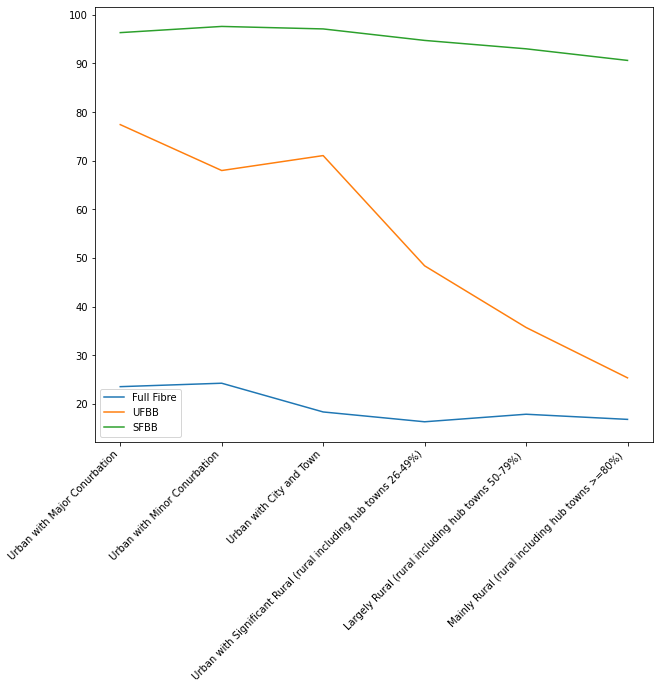

In [325]:
# Visualisation: This plot enables us to visualise these results

plt.subplots(1,1,figsize=(10,8))
plt.plot(meanFF['Classification'],meanFF['Full Fibre availability (% premises)'],label ='Full Fibre')
plt.plot(meanUFBB['Classification'],meanUFBB['UFBB availability (% premises)'],label ='UFBB')
plt.plot(meanSFBB['Classification'],meanSFBB['SFBB availability (% premises)'],label ='SFBB')
plt.xticks(rotation=45,ha='right')
plt.legend()
plt.show()

Analysis: The plot shows the trends well, the oldest option (SFBB) has achieved good coverage across all types of area and the newest (Full Fibre) has only attained around 25% coverage in the most urbanised regions. 
All broadband options show a general trend of coverage decreasing as regions become more rural, this is particularly evident in the UFBB coverage line

### Areas with low-speed connections

In this section we consider how low download speeds can affect peoples internet experience.
One thing highlighted during the pandemic was the importance of high quality connections particularly for people working from home and students who need to access online learning.
Video conferencing is a particularly important tool for these users with various platforms recommending minimum download speeds around 8MBps.
In this section we aim to identify areas that do not meet this requirement and may therefore struggle to access vital tools for work and online learning

In [326]:
#This code filters the merged dataset to return local authoritiy areas that have a significant percentage of premises that do not 
#meet the required minimum download speed of 8 mbps
#When viewing the dataset as a whole we notice that the percentages are relatively low have so we have defined
#'significant' as >=1% of the premises

low_speed = bb_ru_loc_merged[(bb_ru_loc_merged['% of premises with 0<2Mbit/s download speed'] >1) | (bb_ru_loc_merged['% of premises with 2<5Mbit/s download speed'] >1) |(bb_ru_loc_merged['% of premises with 5<10Mbit/s download speed'] >1)]

# We see from the results there are 44 areas returned
low_speed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44 entries, 1 to 283
Data columns (total 15 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   laua                                          44 non-null     object 
 1   Name_x                                        44 non-null     object 
 2   Full Fibre availability (% premises)          44 non-null     float64
 3   SFBB availability (% premises)                44 non-null     float64
 4   UFBB availability (% premises)                44 non-null     float64
 5   % of premises with 0<2Mbit/s download speed   44 non-null     float64
 6   % of premises with 2<5Mbit/s download speed   44 non-null     float64
 7   % of premises with 5<10Mbit/s download speed  44 non-null     float64
 8   Name_y                                        44 non-null     object 
 9   Classification                                44 non-null     obje

In [327]:
#Viewing the filtered low-speed dataset
low_speed.head(44)

,laua,Name_x,Full Fibre availability (% premises),SFBB availability (% premises),UFBB availability (% premises),% of premises with 0<2Mbit/s download speed,% of premises with 2<5Mbit/s download speed,% of premises with 5<10Mbit/s download speed,Name_y,Classification,Numerical classification,District,District Code,Latitude,Longitude
1,E07000026,ALLERDALE,3.2,92.6,3.2,1.2,1.0,1.0,Allerdale,Mainly Rural (rural including hub towns >=80%),1.0,Allerdale,E07000026,54.713100,-3.361350
5,E07000105,ASHFORD,9.4,90.8,46.5,0.3,1.4,1.6,Ashford,Urban with Significant Rural (rural including ...,3.0,Ashford,E07000105,51.135300,0.837573
27,E07000143,BRECKLAND,21.8,91.1,23.1,0.7,1.0,1.2,Breckland,Mainly Rural (rural including hub towns >=80%),1.0,Breckland,E07000143,52.581001,0.868370
54,E07000225,CHICHESTER,21.2,90.5,22.8,0.3,0.6,1.2,Chichester,Largely Rural (rural including hub towns 50-79%),2.0,Chichester,E07000225,50.874100,-0.767290
59,E06000052,CORNWALL,32.0,87.2,34.9,0.3,0.7,1.3,Cornwall,Mainly Rural (rural including hub towns >=80%),1.0,Cornwall,E06000052,50.328300,-4.952620
63,E07000163,CRAVEN,12.7,92.1,17.8,1.0,0.8,1.1,Craven,Mainly Rural (rural including hub towns >=80%),1.0,Craven,E07000163,54.002899,-2.130730
67,E06000005,DARLINGTON,2.9,94.5,83.5,0.7,1.2,1.1,Darlington,Urban with City and Town,4.0,Darlington,E06000005,54.529900,-1.550320
70,E07000035,DERBYSHIRE DALES,9.0,89.9,9.0,0.5,1.2,1.8,Derbyshire Dales,Mainly Rural (rural including hub towns >=80%),1.0,Derbyshire Dales,E07000035,53.153801,-1.658150
76,E07000040,EAST DEVON,35.0,89.5,35.7,0.5,1.5,1.9,East Devon,Largely Rural (rural including hub towns 50-79%),2.0,East Devon,E07000040,50.727699,-3.249200
78,E07000137,EAST LINDSEY,4.3,87.9,15.7,1.0,1.7,2.2,East Lindsey,Mainly Rural (rural including hub towns >=80%),1.0,East Lindsey,E07000137,53.250198,0.080482


### Visualization/Analysis:
The histogram below shows the count of areas that do not meet minimum speed requirements by classifiction,
we see clear correlation to area type with most rural areas having the highest count of inadequate speeds

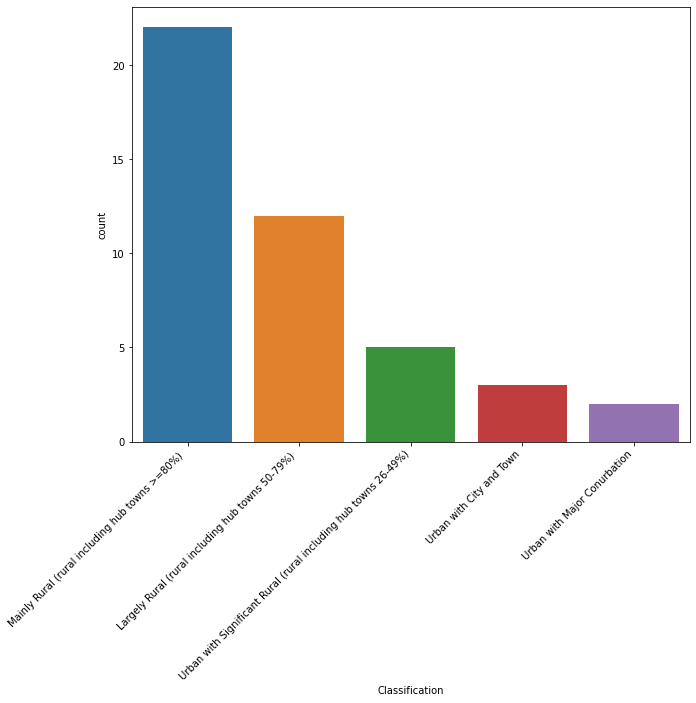

In [334]:
ax=plt.subplots(1,1,figsize=(10,8))
sns.countplot(x='Classification',data = low_speed,order = low_speed['Classification'].value_counts().index)
plt.xticks(rotation=45,ha='right')
plt.show()

### Visualizing low speed areas on a map

In this section we visualise the areas identified previously where there are potential issues with low-speed connectivity
by plotting on a map of the UK

In [329]:
#Installing/Importing the relevant libraries
# !pip install plotly
# !pip install geojson_rewind

import json
import folium
from folium.plugins import HeatMap

In [330]:
#importing  map of the UK to plot our data onto
ukmap = folium.Map(location = [54.76999101318324, -2.8478385244334445], zoom_start = 5.5) 

In [331]:
#Display the data from the filtered low-speed dataset
#Simplifying the dots on the map to be easier to view

from folium.plugins import MarkerCluster

l1 = []
l2 = []

mcluster = MarkerCluster().add_to(ukmap)
for a in low_speed.index:
    folium.Marker(location = [low_speed.loc[a,"Latitude"], low_speed.loc[a,"Longitude"]],
                  zoom_start = 5.5,
                  tooltip = low_speed.loc[a,"Name_x"]).add_to(mcluster)
    l1.append(low_speed.loc[a,"Latitude"])
    l2.append(low_speed.loc[a,"Longitude"])
            
ukmap